In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# povcal info http://iresearch.worldbank.org/PovcalNet/Docs/dictionary.html#pop
data = pd.read_csv('out.csv')

In [3]:
# int years, some fractional values, e.g. 1900.5
data['Year'] = [int(i) for i in data['Year']]

In [4]:
data.head()

,Year,DataType,Mean,Pov.line,Headcount,Pov. gap,Squared,Watts,Gini,Median,MLD,Population,Country
0,2017,i,727.65,1.9,0.44,0.20,0.15,0.12,40.63,559.21,30.0449,40.62,Argentina
1,2016,i,707.36,1.9,0.58,0.27,0.18,0.24,42.40,532.07,32.6677,40.18,Argentina
2,2014,i,648.49,1.9,0.74,0.33,0.22,0.26,41.40,489.73,31.2491,39.28,Argentina
3,2013,i,705.86,1.9,0.75,0.32,0.22,0.25,40.96,546.43,31.0329,38.82,Argentina
4,2012,i,704.11,1.9,0.80,0.32,0.22,0.34,41.24,538.74,31.3420,38.36,Argentina


In [5]:
countries_name_poverty = data['Country'].unique()
countries_name_poverty

array(['Argentina', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico',
       'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'St. Lucia', 'Suriname',
       'Trinidad and Tobago', 'Uruguay',
       'Venezuela, Republica Bolivariana de'], dtype=object)

# Population in extreme poverty in Brazil

In [6]:
data_brazil = data[data['Country'] == 'Brazil']

In [7]:
# on reverse way to cresc order.
years_br = data_brazil['Year'].values[::-1]
headcount_br = data_brazil['Headcount'].values[::-1]

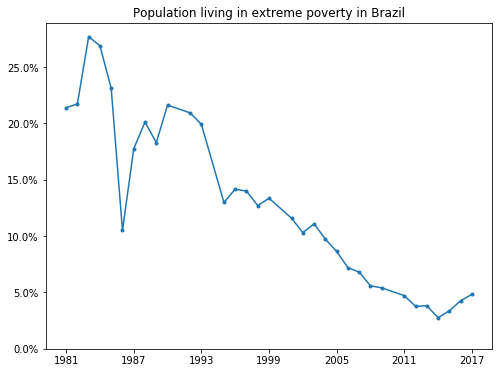

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(years_br, headcount_br, marker='.')
plt.title('Population living in extreme poverty in Brazil')
plt.xticks(np.arange(years_br[0], years_br[-1] + 1, step=6))

perc = np.linspace(0.0, 25.0, 6)
perc_str = ['{}%'.format(str(i))  for i in perc]

plt.yticks(perc, perc_str)
plt.show()

# Geopandas

In [9]:
import geopandas as gpd

In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world['continent'] == 'South America')]
countries_name_geo = world['name'].unique()
countries_to_map = np.intersect1d(countries_name_poverty, countries_name_geo)
world = world[world['name'].isin(countries_to_map)]

In [11]:
print(countries_name_poverty)
print(countries_name_geo)

['Argentina' 'Belize' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Guatemala' 'Guyana' 'Haiti'
 'Honduras' 'Jamaica' 'Mexico' 'Nicaragua' 'Panama' 'Paraguay' 'Peru'
 'St. Lucia' 'Suriname' 'Trinidad and Tobago' 'Uruguay'
 'Venezuela, Republica Bolivariana de']
['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Ecuador'
 'Falkland Is.' 'Guyana' 'Peru' 'Paraguay' 'Suriname' 'Uruguay'
 'Venezuela']


In [12]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
21,9775246.0,South America,Bolivia,BOL,43270.0,POLYGON ((-62.84646847192156 -22.0349854468694...
22,198739269.0,South America,Brazil,BRA,1993000.0,POLYGON ((-57.62513342958296 -30.2162948544542...
29,16601707.0,South America,Chile,CHL,244500.0,(POLYGON ((-68.63401022758316 -52.636370458874...
35,45644023.0,South America,Colombia,COL,395400.0,POLYGON ((-75.37322323271385 -0.15203175212045...
46,14573101.0,South America,Ecuador,ECU,107700.0,POLYGON ((-80.30256059438722 -3.40485645916471...
67,772298.0,South America,Guyana,GUY,2966.0,POLYGON ((-59.75828487815919 8.367034816924047...
124,29546963.0,South America,Peru,PER,247300.0,POLYGON ((-69.59042375352405 -17.5800118954193...
131,6995655.0,South America,Paraguay,PRY,28890.0,POLYGON ((-62.68505713565789 -22.2490292294223...
148,481267.0,South America,Suriname,SUR,4254.0,POLYGON ((-57.14743648947689 5.973149929219161...


In [13]:
data_poverty_2015 = data[data['Year'] == 2015]
data_poverty_2015

,Year,DataType,Mean,Pov.line,Headcount,Pov. gap,Squared,Watts,Gini,Median,MLD,Population,Country
37,2015,i,417.83,1.9,6.35,2.81,1.73,4.88,46.73,294.75,42.5628,10.72,Bolivia
57,2015,i,585.52,1.9,3.37,1.17,0.61,1.47,51.32,366.52,48.5797,205.96,Brazil
89,2015,i,657.85,1.9,1.30,0.76,0.61,0.84,47.65,424.68,42.9823,17.76,Chile
104,2015,i,439.77,1.9,4.54,1.75,1.05,2.30,51.10,271.93,50.1763,48.23,Colombia
126,2015,i,697.26,1.9,1.52,0.59,0.37,0.69,48.38,441.36,42.9560,4.81,Costa Rica
156,2015,i,440.42,1.9,1.78,0.45,0.19,0.65,45.18,301.33,35.4090,10.53,Dominican Republic
179,2015,i,418.81,1.9,3.44,1.23,0.67,1.59,45.95,286.75,38.1569,16.14,Ecuador
200,2015,i,308.74,1.9,1.93,0.40,0.13,0.50,40.55,227.99,27.8308,6.31,El Salvador
235,2015,i,233.33,1.9,16.16,5.64,2.78,8.16,49.58,152.82,45.1408,8.96,Honduras
311,2015,i,714.84,1.9,1.98,0.53,0.24,0.58,50.81,456.09,47.7320,3.97,Panama


In [14]:
world['headcount'] = 0

In [15]:
for i in world['name']:
    query = data_poverty_2015['Headcount'].loc[data_poverty_2015['Country'] == i].values
    if (len(query) > 0):
        world.loc[world['name'] == i, 'headcount'] = query[0]

In [16]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,headcount
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,0.00
21,9775246.0,South America,Bolivia,BOL,43270.0,POLYGON ((-62.84646847192156 -22.0349854468694...,6.35
22,198739269.0,South America,Brazil,BRA,1993000.0,POLYGON ((-57.62513342958296 -30.2162948544542...,3.37
29,16601707.0,South America,Chile,CHL,244500.0,(POLYGON ((-68.63401022758316 -52.636370458874...,1.30
35,45644023.0,South America,Colombia,COL,395400.0,POLYGON ((-75.37322323271385 -0.15203175212045...,4.54
46,14573101.0,South America,Ecuador,ECU,107700.0,POLYGON ((-80.30256059438722 -3.40485645916471...,3.44
67,772298.0,South America,Guyana,GUY,2966.0,POLYGON ((-59.75828487815919 8.367034816924047...,0.00
124,29546963.0,South America,Peru,PER,247300.0,POLYGON ((-69.59042375352405 -17.5800118954193...,3.55
131,6995655.0,South America,Paraguay,PRY,28890.0,POLYGON ((-62.68505713565789 -22.2490292294223...,1.89
148,481267.0,South America,Suriname,SUR,4254.0,POLYGON ((-57.14743648947689 5.973149929219161...,0.00


In [17]:
# data_['gdp_per_cap'] = data_.gdp_md_est / data_.pop_est
# data_.plot(column='gdp_per_cap', figsize=(16,12));
# plt.show()

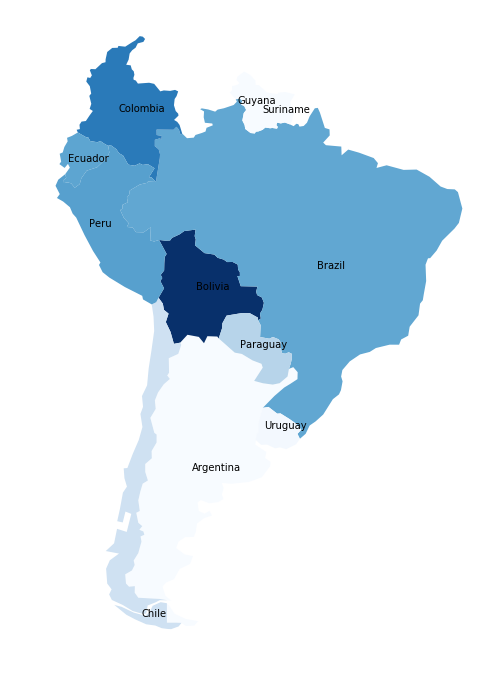

In [18]:
ax = world.plot(column='headcount', figsize=(16, 12), cmap='Blues')
plt.axis('off')

for x, y, label in zip(world.geometry.representative_point().x - 2.0, world.geometry.representative_point().y - 0.5, world.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

# # Create colorbar as a legend
# sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=10))
# # empty array for the data range
# sm._A = []
# # add the colorbar to the figure
# # cbar = fig.colorbar(sm)

plt.show()